## Assignment on Random Forest - Regression algorithm - Predict the flight price using flight price dataset - 07/03

#### Import necessary interfaces

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
os.chdir(r'C:\Users\kalya\Santhosh\Data Science\Notebook\Preprocessing')

#### Read the flight price file

In [3]:
data = pd.read_csv('Flight_price.csv')

In [4]:
data.head()

,Serial_number,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


#### Analysis on data

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial_number,300153.0,150076.000000,86646.852011,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [7]:
data.shape

(300153, 12)

In [10]:
data = data.drop(columns = ['Serial_number'])

In [11]:
data.shape

(300153, 11)

In [13]:
data.airline.unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [17]:
data.flight.value_counts().sort_values()

G8-107        1
6E-2914       1
SG-8480       1
SG-1058       1
SG-8106       1
           ... 
UK-822     2468
UK-836     2542
UK-720     2650
UK-772     2741
UK-706     3235
Name: flight, Length: 1561, dtype: int64

In [29]:
data['flight'].apply(lambda x: x.split('-')[-1])

0         8709
1         8157
2          764
3          995
4          963
          ... 
300148     822
300149     826
300150     832
300151     828
300152     822
Name: flight, Length: 300153, dtype: object

In [31]:
data.source_city.unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [32]:
data.departure_time.unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [33]:
data.stops.unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [34]:
data.arrival_time.unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [35]:
data.destination_city.unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [38]:
data['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [39]:
data.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [40]:
data.duplicated().sum()

0

In [42]:
data.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [50]:
data.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

#### data cleaning - Preprocessing

In [43]:
data_filter_category = pd.get_dummies(data.drop(columns = ['flight', 'duration', 'days_left', 'price']))

In [55]:
data_preprocessed = pd.concat([data_filter_category, data.drop(columns = ['flight','airline', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'])], axis=1)

In [56]:
data_preprocessed.head()

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy,duration,days_left,price
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,2.17,1,5953
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,2.33,1,5953
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,2.17,1,5956
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,2.25,1,5955
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,2.33,1,5955


#### Modelling

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [62]:
X = data_preprocessed.drop(columns = 'price')

In [63]:
y = data_preprocessed['price']

In [64]:
display(X.head(), y.head())

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy,duration,days_left
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,2.17,1
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,2.33,1
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,2.17,1
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,2.25,1
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,2.33,1


0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

In [66]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.2, random_state = 32)

In [67]:
model = RandomForestRegressor()

In [68]:
model.fit(X,y)

RandomForestRegressor()

<AxesSubplot:>

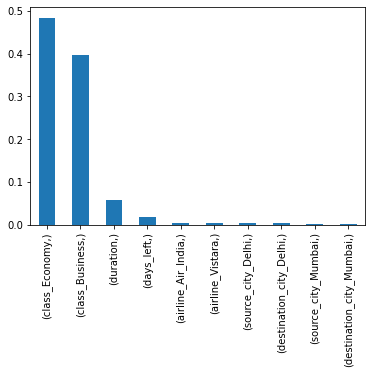

In [69]:
pd.Series(model.feature_importances_, index = [X.columns]).sort_values(ascending=False)[:10].plot(kind = 'bar')

In [70]:
def rmsle(y_true, y_pred):
    return 1 - np.sqrt(np.square(np.log10(y_pred + 1) - np.log10(y_true + 1)).mean())

#### Result

In [71]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)
print("TRAIN RMSLE : ", rmsle(train_y, train_pred))
print("TEST RMSLE : ", rmsle(test_y, test_pred))

TRAIN RMSLE :  0.9766797497000552
TEST RMSLE :  0.9764248058948866
